In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, BatchNormalization 


In [2]:
dataset_path = tf.keras.utils.get_file( 'auto-mpg.data', 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data' )

In [3]:
column_names = [ "MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin"]

In [4]:
raw_dataset = pd.read_csv( dataset_path, names=column_names, na_values = "?", comment='\t', sep=" ", skipinitialspace=True )

In [5]:
dataset = raw_dataset.copy()

In [6]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [7]:
dataset.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [8]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [9]:
dataset = dataset.dropna()

In [10]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [11]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [12]:
origin = dataset.pop('Origin')

In [13]:
dataset['USA'] = ( origin == 1 ) *1.0
dataset['Europe'] = ( origin == 2 ) *1.0
dataset['Japan'] = ( origin == 3 ) *1.0

In [14]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [15]:
train_dataset = dataset.sample( frac=0.8, random_state=0 )

In [16]:
test_dataset = dataset.drop(train_dataset.index  )

In [17]:
train_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,28.0,4,90.0,75.0,2125.0,14.5,74,1.0,0.0,0.0
282,22.3,4,140.0,88.0,2890.0,17.3,79,1.0,0.0,0.0
69,12.0,8,350.0,160.0,4456.0,13.5,72,1.0,0.0,0.0
378,38.0,4,105.0,63.0,2125.0,14.7,82,1.0,0.0,0.0
331,33.8,4,97.0,67.0,2145.0,18.0,80,0.0,0.0,1.0


In [18]:
test_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
9,15.0,8,390.0,190.0,3850.0,8.5,70,1.0,0.0,0.0
25,10.0,8,360.0,215.0,4615.0,14.0,70,1.0,0.0,0.0
28,9.0,8,304.0,193.0,4732.0,18.5,70,1.0,0.0,0.0
31,25.0,4,113.0,95.0,2228.0,14.0,71,0.0,0.0,1.0
33,19.0,6,232.0,100.0,2634.0,13.0,71,1.0,0.0,0.0


In [19]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [20]:
 len( train_dataset )

314

In [21]:
 len( test_dataset )

78

In [22]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [23]:
def norm(x):
    return ( x - train_stats['mean'] ) / train_stats['std']

In [24]:
normed_train_data = norm(train_dataset)

In [25]:
normed_test_data = norm(test_dataset)

In [26]:
normed_train_stats =  normed_train_data.describe().transpose()

In [27]:
normed_train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,1.824443e-16,1.0,-1.457657,-0.869348,-0.869348,1.483887,1.483887
Displacement,314.0,8.627211e-17,1.0,-1.220325,-0.860894,-0.424785,0.675074,2.489002
Horsepower,314.0,-9.900078e-18,1.0,-1.545283,-0.751241,-0.272190,0.607162,3.153347
Weight,314.0,-8.485781e-17,1.0,-1.589352,-0.869478,-0.198782,0.732017,2.547401
Acceleration,314.0,-5.148041e-16,1.0,-2.710152,-0.630725,-0.021237,0.588250,3.313017
Model Year,314.0,9.772791e-16,1.0,-1.604642,-0.788458,0.027726,0.843910,1.660094
USA,314.0,7.920062e-17,1.0,-1.286751,-1.286751,0.774676,0.774676,0.774676
Europe,314.0,1.980016e-17,1.0,-0.465148,-0.465148,-0.465148,-0.465148,2.143005
Japan,314.0,5.374328e-17,1.0,-0.495225,-0.495225,-0.495225,-0.495225,2.012852


In [28]:
def build_model():
    model = Sequential()
    model.add( Dense( 64, activation='relu', input_shape=[ len(train_dataset.keys()) ] ) )
    model.add( Dense( 64, activation='relu' ) )
    model.add( Dense( 1 ) )
    return model

In [29]:
model = build_model()
model.summary()

C:\Users\jesus\anaconda3\envs\curso_IA\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
optimizer = tf.keras.optimizers.RMSprop( learning_rate=0.001 )

In [31]:
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'] )

In [32]:
EPOCHS = 1000

In [33]:
history = model.fit( normed_train_data, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=1 )

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 579.1877 - mae: 22.9433 - mse: 579.1877 - val_loss: 550.8602 - val_mae: 22.2747 - val_mse: 550.8602
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 503.8655 - mae: 21.2336 - mse: 503.8655 - val_loss: 489.7250 - val_mae: 20.9658 - val_mse: 489.7250
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 471.2865 - mae: 20.6069 - mse: 471.2865 - val_loss: 425.1490 - val_mae: 19.4841 - val_mse: 425.1490
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 414.5191 - mae: 19.1203 - mse: 414.5191 - val_loss: 356.4164 - val_mae: 17.7786 - val_mse: 356.4164
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 311.1170 - mae: 16.6202 - mse: 311.1170 - val_loss: 284.8895 - val_mae: 15.8026 - val_mse: 284.8895
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 263.2420 - mae: 15.1818 - mse: 263.2420 - val_loss: 216.0948 - val_mae: 13.5915 - val_mse: 216.0948
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step -

In [34]:
hist = pd.DataFrame(history.history)

In [35]:
hist['epoch'] = history.epoch


In [36]:
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.630801,1.067563,2.630801,10.149015,2.386080,10.149015,995
996,2.551005,1.026332,2.551005,9.703894,2.381830,9.703894,996
997,2.583919,1.100207,2.583919,10.365304,2.398554,10.365304,997
998,2.594062,1.063950,2.594062,10.695133,2.404949,10.695133,998
999,2.704797,1.071284,2.704797,9.589730,2.312270,9.589730,999


In [37]:
def plot_history(history):
    hist = hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot( hist['epoch'],  hist['mse'], label='Train Error' )
    plt.plot( hist['epoch'],  hist['val_mse'], label='Val Error' )
    plt.ylim( [0,20] )
    plt.legend();

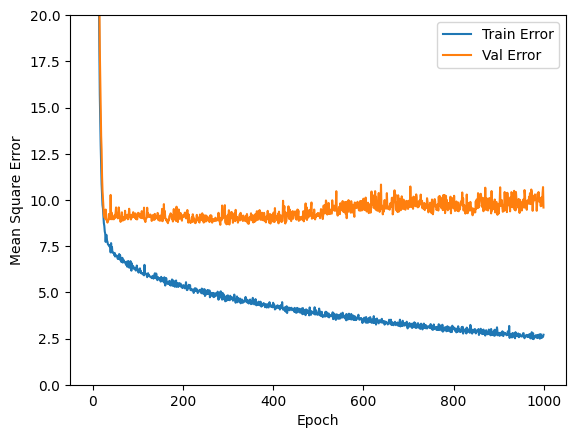

In [38]:
plot_history(history)

In [39]:
def plot_history_mae(history):
    hist = hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot( hist['epoch'],  hist['mae'], label='Train Error' )
    plt.plot( hist['epoch'],  hist['val_mae'], label='Val Error' )
    plt.ylim( [0,20] )
    plt.legend();

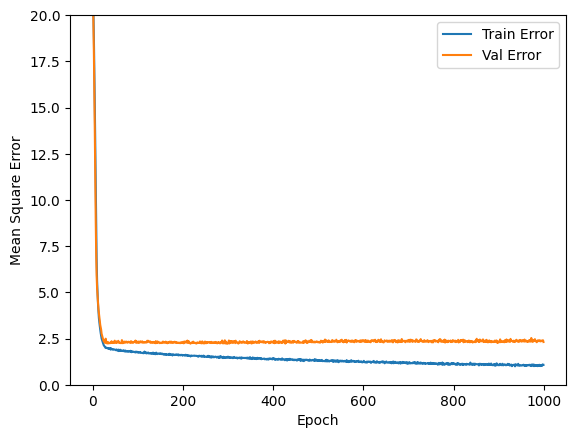

In [40]:
plot_history_mae(history)

In [41]:
def plot_history_loss(history):
    hist = hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot( hist['epoch'],  hist['loss'], label='Train Error' )
    plt.plot( hist['epoch'],  hist['val_loss'], label='Val Error' )
    plt.ylim( [0,20] )
    plt.legend();

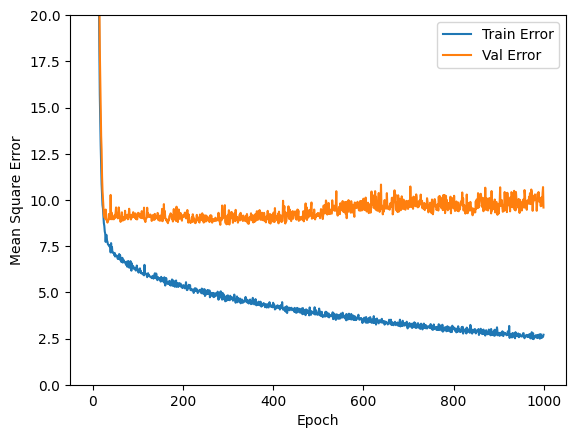

In [42]:
plot_history_loss(history)

In [52]:
optimizer = tf.keras.optimizers.RMSprop( learning_rate=0.001 )

In [53]:
model = build_model()
model.summary()
model.compile( loss='mse', optimizer=optimizer, metrics=['mae', 'mse'] )

C:\Users\jesus\anaconda3\envs\curso_IA\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
early_stop = tf.keras.callbacks.EarlyStopping( monitor='val_loss', patience=10 )

In [55]:
history = model.fit( normed_train_data, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=1, callbacks=[early_stop])

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 587.7063 - mae: 23.0715 - mse: 587.7063 - val_loss: 559.5655 - val_mae: 22.3107 - val_mse: 559.5655
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 540.2600 - mae: 21.8431 - mse: 540.2600 - val_loss: 503.8567 - val_mae: 21.0778 - val_mse: 503.8567
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 470.3004 - mae: 20.4690 - mse: 470.3004 - val_loss: 446.6428 - val_mae: 19.7511 - val_mse: 446.6428
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 434.1514 - mae: 19.5151 - mse: 434.1514 - val_loss: 387.5172 - val_mae: 18.2976 - val_mse: 387.5172
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 368.5710 - mae: 17.9945 - mse: 368.5710 - val_loss: 323.8033 - val_mae: 16.6088 - val_mse: 323.8033
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 307.4461 - mae: 16.1886 - mse: 307.4461 - val_loss: 260.3976 - val_mae: 14.7389 - val_mse: 260.3976
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step -

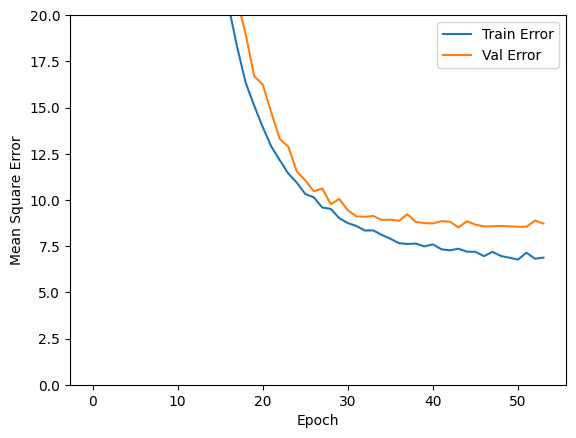

In [56]:
plot_history(history)

In [58]:
loss, mse, mae = model.evaluate( normed_test_data, test_labels )

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4071 - mae: 1.7786 - mse: 5.4071 


In [59]:
print( "Abs Error {:5.2f}".format(mae) )
print( "Sqr Error {:5.2f}".format(mse) )
print( "Loss Error {:5.2f}".format(loss) )

Abs Error  6.18
Sqr Error  1.95
Loss Error  6.18
